c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5918299843029218

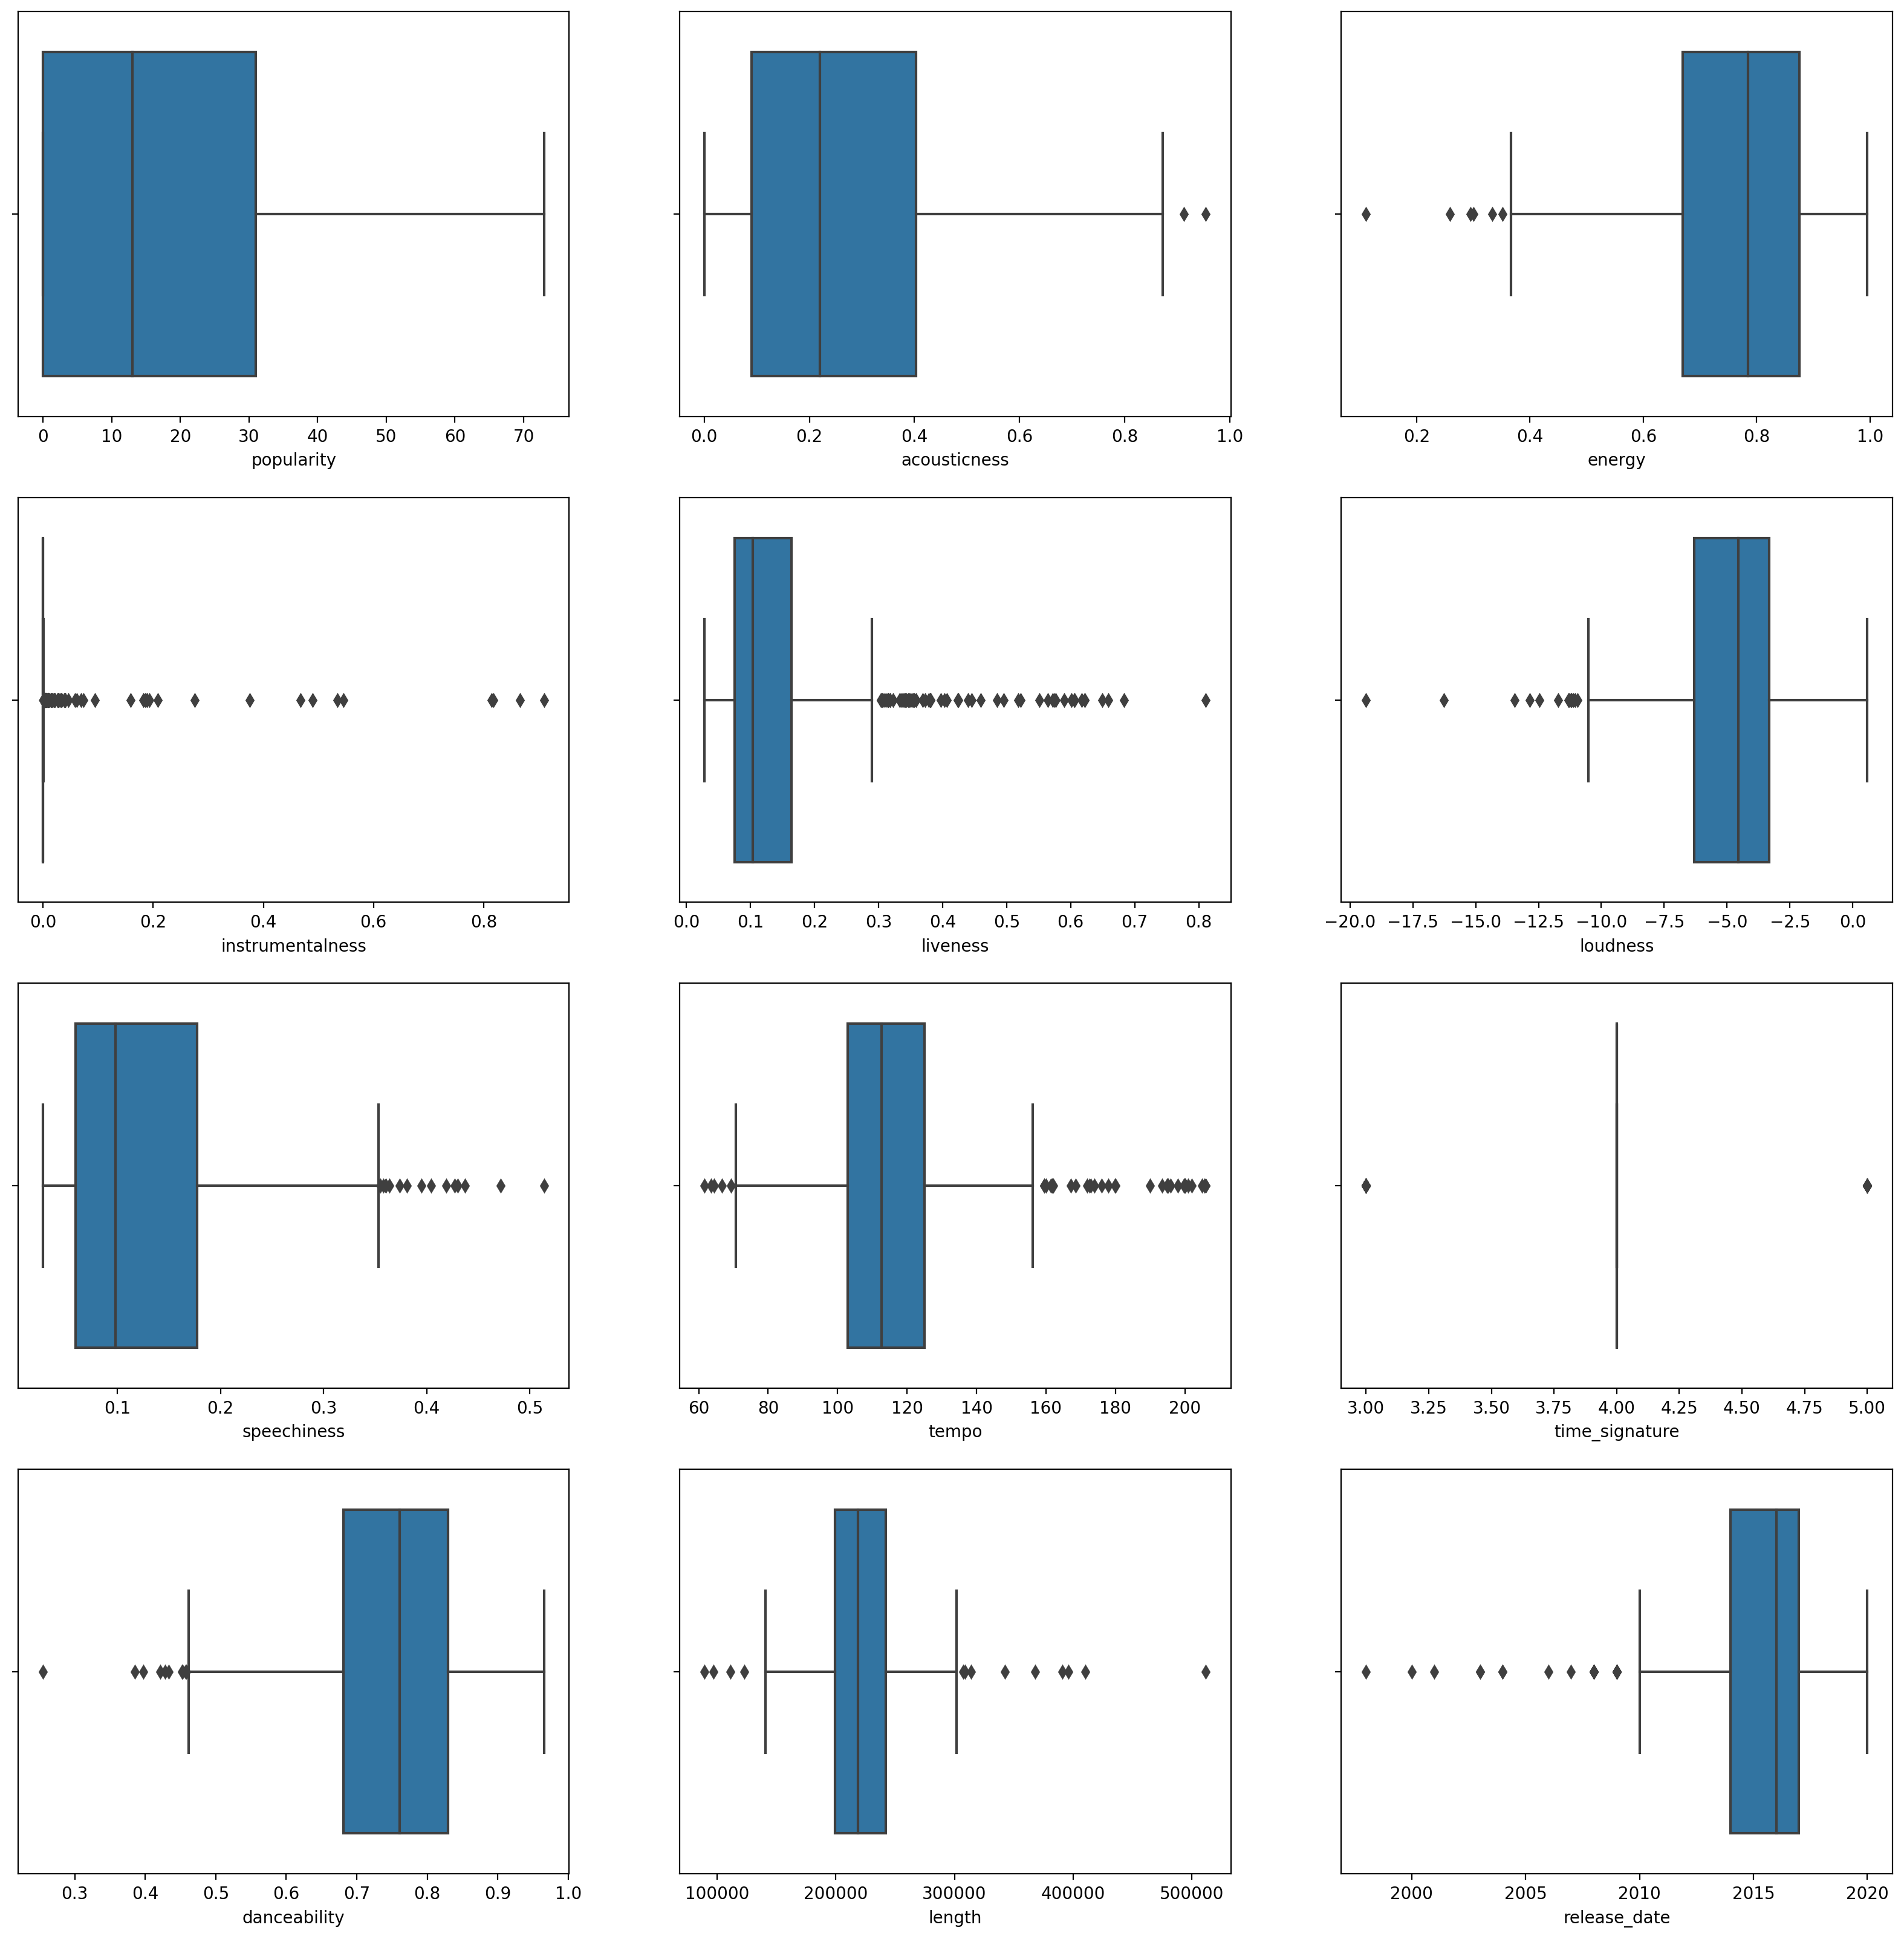

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#tart by taking another look at the songs data. Create a boxplot, calling boxplot() for each column:


df = pd.read_csv("C:\\Users\\HP\\Desktop\\-ArewaDS-Machine-Learning-Assignments--1\\Data\\nigerian-songs.csv")
#df.tail()

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

#This data is a little noisy: by observing each column as a boxplot, you can see outliers.
#You could go through the dataset and remove these outliers, but that would make the data 
# pretty minimal. For now, choose which columns you will use for your clustering exercise. 
# Pick ones with similar ranges and encode the artist_top_genre column as numeric data:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

#You could go through the dataset and remove these outliers, but that would make the data pretty minimal.
#For now, choose which columns you will use for your clustering exercise. 
#Pick ones with similar ranges and encode the artist_top_genre column as numeric data:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

#Now you need to pick how many clusters to target. You know there are 3 song genres that we carved out of the dataset, so let's try 3:

from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

#You see an array printed out with predicted clusters (0, 1,or 2) for each row of the dataframe.
# Use this array to calculate a 'silhouette score':

from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score


#Look for a silhouette score closer to 1. This score varies from -1 to 1, and if the score is 1, 
# the cluster is dense and well-separated from other clusters. A value near 0 represents overlapping 
# clusters with samples very close to the decision boundary of the neighboring clusters.source.
# Our score is .53, so right in the middle. This indicates that our data is not particularly 
# well-suited to this type of clustering.
